In [4]:
# pip install openpyxl

     -------------------------------------- 250.0/250.0 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Read in buoy data
file = "C:/Users/rache/Documents/University of Southern California/2023-2024 Year 4/GEOL 599 Environmental data science/data/HW8_buoy_data.xlsx" #note on path
buoy_all = pd.read_excel(file)

In [3]:
# Take a look at the data.
buoy_all.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2023,1,1,0,26,999,99,99,1.12,12.50,7.69,269,9999,999,15.3,999,99,99
1,2023,1,1,0,56,999,99,99,1.16,11.76,7.34,272,9999,999,15.3,999,99,99
2,2023,1,1,1,26,999,99,99,1.20,12.50,7.08,268,9999,999,15.3,999,99,99
3,2023,1,1,1,56,999,99,99,1.25,10.53,7.33,268,9999,999,15.4,999,99,99
4,2023,1,1,2,26,999,99,99,1.27,10.53,7.57,268,9999,999,15.5,999,99,99


In [4]:
# Select only needed columns and rename them
buoy = buoy_all.loc[:,['WVHT','DPD','APD','MWD','WTMP']]
buoy = buoy.rename(columns={'WVHT':'height','DPD':'dom pd','APD':'avg pd','MWD':'dir','WTMP':'temp'})
buoy.head()

,height,dom pd,avg pd,dir,temp
0,1.12,12.50,7.69,269,15.3
1,1.16,11.76,7.34,272,15.3
2,1.20,12.50,7.08,268,15.3
3,1.25,10.53,7.33,268,15.4
4,1.27,10.53,7.57,268,15.5


In [5]:
# Drop rows with no data (cell value = 99)
buoy[(buoy['height']==99)|(buoy['dom pd']==99)|(buoy['avg pd']==99)|(buoy['dir']==99)|(buoy['temp']==99)] #See rows with no data
buoy= buoy.drop(buoy[buoy['height']==99].index)

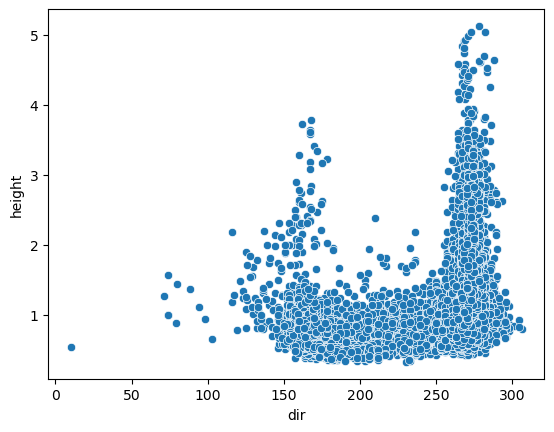

In [6]:
# Check out the data. Plot the different variables against wave height.
sns.scatterplot(data=buoy, x='dir', y='height')
plt.show()

In [9]:
# Convert data to numpy array
X = buoy.loc[:,['dom pd','avg pd','dir','temp']].to_numpy()
X

array([[ 12.5 ,   7.69, 269.  ,  15.3 ],
       [ 11.76,   7.34, 272.  ,  15.3 ],
       [ 12.5 ,   7.08, 268.  ,  15.3 ],
       ...,
       [ 13.33,  10.5 , 268.  ,  16.8 ],
       [ 14.29,  10.32, 271.  ,  16.8 ],
       [ 12.5 ,  10.54, 271.  ,  16.9 ]])

In [10]:
# Convert data to numpy array
y = buoy.loc[:,'height'].to_numpy()
y

array([1.12, 1.16, 1.2 , ..., 1.79, 1.66, 1.7 ])

In [11]:
# Split the data into training, validation, and test datasets (75:10:15 split)
Xtr, X1 , ytr, y1 = tts(X, y, test_size= 0.25) #split into 75% training, 25% everything else
Xva, Xte, yva, yte = tts(X1, y1, test_size= 0.6) #split the 25% into 40% validation (10% of original), 60% test (15% of original)

In [12]:
# Fit linear ODE as baseline model for comparison
lin = linear_model.LinearRegression()
lin.fit(Xtr, ytr)
print(lin.score(Xtr,ytr))
print(lin.score(Xva,yva))
print(lin.score(Xte,yte))

0.2944121819721556
0.28478137369470125
0.30055990122131804


In [13]:
# Print MSE of linear ODE model
print(mse(ytr, lin.predict(Xtr)))
print(mse(yva, lin.predict(Xva)))
print(mse(yte, lin.predict(Xte)))

0.1996909461966401
0.18350740192384662
0.18374205906293647


In [14]:
# With the same data splits, fit a decision tree regressor
tree= DecisionTreeRegressor(max_depth= 10)
tree.fit(Xtr,ytr)
print(tree.score(Xtr,ytr))
print(tree.score(Xva,yva))
# validation set indicates optimal tree depth to be about 10

0.7283992874762072
0.5717854766712941


In [15]:
# Use decision tree model on test data
print(tree.score(Xte,yte))
print(mse(yte, tree.predict(Xte)))

0.6003752668263865
0.10498092896591349


In [19]:
# With the same data splits, fit a random forest regressor with 25 trees
forest= RandomForestRegressor(n_estimators= 25, max_depth= 30)
forest.fit(Xtr,ytr)
print(forest.score(Xtr,ytr))
print(forest.score(Xva,yva))
# validation set indicates optimal tree depth to be about 30

0.9551827739007215
0.6537586914952798


In [20]:
# Use random forest model on test data
print(forest.score(Xte,yte))
print(mse(yte, forest.predict(Xte)))

0.7089138076328199
0.07646798695660635


In [21]:
# Print the 3 models' (linear regression, decision tree, random forest) scores and MSE for test data
print("Linear score:", lin.score(Xte,yte).round(3))
print("Linear MSE:", mse(yte, lin.predict(Xte)).round(3))
print("Decision tree score:", tree.score(Xte,yte).round(3))
print("Decision tree MSE:", mse(yte, tree.predict(Xte)).round(3))
print("Random forest score:", forest.score(Xte,yte).round(3))
print("Random forest MSE:", mse(yte, forest.predict(Xte)).round(3))

Linear score: 0.301
Linear MSE: 0.184
Decision tree score: 0.6
Decision tree MSE: 0.105
Random forest score: 0.709
Random forest MSE: 0.076


In [ ]:
# 1.) Of the 3 models tested, the random forest model performs best, with the highest score and the lowest MSE.
# 2.) The cost functions I'm using are ordinary least squares for the linear model and mean squared error for both the decision tree and random forest models.
# 3.) The only hyperparameter I optimized is maximum tree depth for both the decision tree model and random forest model.

In [22]:
# Redo the models with a different dataset split 60:10:30
Xtr2, X2 , ytr2, y2 = tts(X, y, test_size= 0.4) 
Xva2, Xte2, yva2, yte2 = tts(X1, y1, test_size= 0.75)

In [23]:
# Print scores and MSEs for new split
print("Linear score:", lin.score(Xte2,yte2).round(3))
print("Linear MSE:", mse(yte2, lin.predict(Xte2)).round(3))
print("Decision tree score:", tree.score(Xte2,yte2).round(3))
print("Decision tree MSE:", mse(yte2, tree.predict(Xte2)).round(3))
print("Random forest score:", forest.score(Xte2,yte2).round(3))
print("Random forest MSE:", mse(yte2, forest.predict(Xte2)).round(3))

Linear score: 0.301
Linear MSE: 0.183
Decision tree score: 0.58
Decision tree MSE: 0.11
Random forest score: 0.672
Random forest MSE: 0.086


In [24]:
# Redo the models with a different dataset split 80:8:12
Xtr3, X3 , ytr3, y3 = tts(X, y, test_size= 0.2) 
Xva3, Xte3, yva3, yte3 = tts(X1, y1, test_size= 0.60)

In [25]:
# Print scores and MSEs for new split
print("Linear score:", lin.score(Xte3,yte3).round(3))
print("Linear MSE:", mse(yte3, lin.predict(Xte3)).round(3))
print("Decision tree score:", tree.score(Xte3,yte3).round(3))
print("Decision tree MSE:", mse(yte3, tree.predict(Xte3)).round(3))
print("Random forest score:", forest.score(Xte3,yte3).round(3))
print("Random forest MSE:", mse(yte3, forest.predict(Xte3)).round(3))

Linear score: 0.285
Linear MSE: 0.179
Decision tree score: 0.588
Decision tree MSE: 0.103
Random forest score: 0.678
Random forest MSE: 0.081


In [ ]:
# 4.) Redoing the validation splits changes the scores and MSEs slightly, but it doesn't change the 3 models' performances much.

In [26]:
# Generate set of random forest models with different # of trees
f2 = RandomForestRegressor(n_estimators= 2, max_depth= 30)
f10 = RandomForestRegressor(n_estimators= 10, max_depth= 30)
f50 = RandomForestRegressor(n_estimators= 50, max_depth= 30)
f100 = RandomForestRegressor(n_estimators= 100, max_depth= 30)
f250 = RandomForestRegressor(n_estimators= 250, max_depth= 30)
f500 = RandomForestRegressor(n_estimators= 500, max_depth= 30)
f1000 = RandomForestRegressor(n_estimators= 1000, max_depth= 30)

In [27]:
# Fit all the new random forest models
f2.fit(Xtr,ytr)
f10.fit(Xtr,ytr)
f50.fit(Xtr,ytr)
f100.fit(Xtr,ytr)
f250.fit(Xtr,ytr)
f500.fit(Xtr,ytr)
f1000.fit(Xtr,ytr)

RandomForestRegressor(max_depth=30, n_estimators=1000)

In [31]:
# Print out the training data MSEs of all the random forest models to see
print(mse(ytr, f2.predict(Xtr)),
mse(ytr, f10.predict(Xtr)),
mse(ytr, forest.predict(Xtr)),
mse(ytr, f50.predict(Xtr)),
mse(ytr, f100.predict(Xtr)),
mse(ytr, f250.predict(Xtr)),
mse(ytr, f500.predict(Xtr)),
mse(ytr, f1000.predict(Xtr)))

0.03527078044610983 0.015397424662109676 0.012683884354307982 0.011585080808324488 0.011165077450024263 0.010858228650074573 0.010666447410720526 0.010632058905825439


In [47]:
# Make a list of the MSEs and turn it into a dataframe
tree_num= [2.0,10,25,50,100,250,500,1000]
mse1= [mse(ytr, f2.predict(Xtr)), mse(ytr, f10.predict(Xtr)), mse(ytr, forest.predict(Xtr)), mse(ytr, f50.predict(Xtr)), mse(ytr, f100.predict(Xtr)), mse(ytr, f250.predict(Xtr)), mse(ytr, f500.predict(Xtr)), mse(ytr, f1000.predict(Xtr))]
mse2= [mse(yva, f2.predict(Xva)), mse(yva, f10.predict(Xva)), mse(yva, forest.predict(Xva)), mse(yva, f50.predict(Xva)), mse(yva, f100.predict(Xva)), mse(yva, f250.predict(Xva)), mse(yva, f500.predict(Xva)), mse(yva, f1000.predict(Xva))]
MSE_data= {'number of trees':tree_num, 'training data MSE':mse1, 'validation data MSE':mse2}

In [52]:
# Turn the MSE data into a dataframe
MSE_df= pd.DataFrame(MSE_data)
MSE_df

,number of trees,training data MSE,validation data MSE
0,2.0,0.035271,0.111867
1,10.0,0.015397,0.097492
2,25.0,0.012684,0.088837
3,50.0,0.011585,0.088460
4,100.0,0.011165,0.085953
5,250.0,0.010858,0.085224
6,500.0,0.010666,0.085301
7,1000.0,0.010632,0.085643


In [60]:
# Turn MSE dataframe to long format
MSE_df = MSE_df.rename(columns= {'training data MSE':'training', 'validation data MSE':'validation'})
MSE_df_long = pd.melt(MSE_df, id_vars= ['number of trees'], value_vars= ['training','validation'])
MSE_df_long

,number of trees,variable,value
0,2.0,training,0.035271
1,10.0,training,0.015397
2,25.0,training,0.012684
3,50.0,training,0.011585
4,100.0,training,0.011165
5,250.0,training,0.010858
6,500.0,training,0.010666
7,1000.0,training,0.010632
8,2.0,validation,0.111867
9,10.0,validation,0.097492


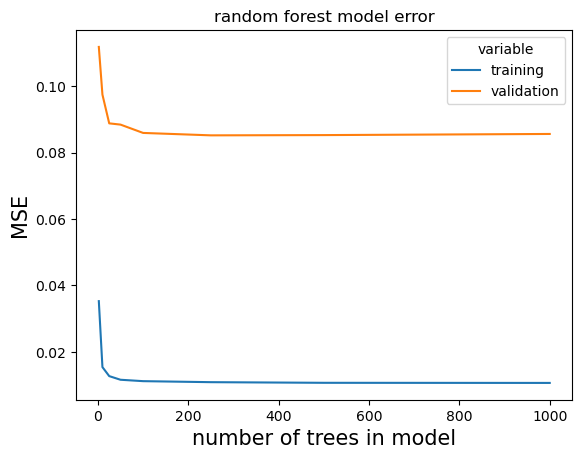

In [66]:
# 5.) Plot the number of trees vs. the MSEs
plot= sns.lineplot(data=MSE_df_long, x='number of trees', y='value', hue= 'variable')
plot.set_title("random forest model error")
plt.xlabel("number of trees in model", fontsize= 15)
plt.ylabel("MSE", fontsize= 15)
plt.show()

In [ ]:
# 6.) Since the MSEs for the validation dataset is systematically higher than that of the trainnig dataset, even with 1000 trees, there is an issue of overfitting data. The MSEs for the trainng and validation datasets would be more similar if overfitting was absent.